# 基础命令

In [ ]:
import os
import sys

### model.py命令行：
"""
python model.py \
  --genes dataset/PROGENy_gene.csv \
  --tf dataset/PROGENy_tf.csv \
  --mirna dataset/PROGENy_mirna.csv \
  --labels dataset/PROGENy_labels.csv \
  --fusion concat \
  --select 1 0 0  \
  --hidden 1024 \
  --blocks 3 \
  --batch 32 \
  --epochs 50 \
  --lr 1e-3 \
  --seed 14
"""

'\npython model_origin.py   --x_file X_0_all.csv   --y_file Y_all.csv   --tf PROGENy_tf.csv   --mirna PROGENy_mirna.csv   --fusion concate   --hidden 1024   --blocks 3   --batch 32   --epochs 50   --lr 1e-3   --seed 14\n'

# 定义函数

In [ ]:
import subprocess
import re
from tabulate import tabulate
from tqdm import tqdm

def extract_metrics(output):
    """Extract best Train, Val, and Test metrics from output text."""
    metrics = {}

    # Best Train
    train_match = re.search(r"Best Train\s*->\s*loss=\s*([\d.]+), acc=\s*([\d.]+) %.*, f1=\s*([\d.]+) %", output)
    if train_match:
        metrics['train_loss'] = float(train_match.group(1))
        metrics['train_acc']  = float(train_match.group(2))
        metrics['train_f1']   = float(train_match.group(3))

    # Best Val
    val_match = re.search(r"Best Val\s*->\s*loss=\s*([\d.]+), acc=\s*([\d.]+) %.*, f1=\s*([\d.]+) %", output)
    if val_match:
        metrics['val_loss'] = float(val_match.group(1))
        metrics['val_acc']  = float(val_match.group(2))
        metrics['val_f1']   = float(val_match.group(3))

    # Test
    test_match = re.search(r"Test loss=\s*([\d.]+), acc=\s*([\d.]+) %.*, f1=\s*([\d.]+) %", output)
    if test_match:
        metrics['test_loss'] = float(test_match.group(1))
        metrics['test_acc']  = float(test_match.group(2))
        metrics['test_f1']   = float(test_match.group(3))

    return metrics

def run_new(num_runs,n1,n2,n3):
    results = []
    n1 = str(n1)
    n2 = str(n2)
    n3 = str(n3)

    pbar = tqdm(range(num_runs))
    for i in pbar:
        pbar.set_description(f"Run {i+1}/{num_runs}")
        
        seed = i * 7 + 7

        cmd = [
            "python", "model.py",
            "--genes", "dataset/PROGENy_gene.csv",
            "--tf", "dataset/PROGENy_tf.csv",
            "--mirna", "dataset/PROGENy_mirna.csv",
            "--labels", "dataset/PROGENy_labels.csv",
            "--fusion", "concat",
            "--select", n1, n2, n3,
            "--hidden", "1024",
            "--blocks", "3",
            "--batch", "32",
            "--epochs", "50",
            "--lr", "1e-3",
            "--seed", str(seed)
        ]

        # Capture output
        proc = subprocess.run(cmd, capture_output=True, text=True)
        output = proc.stdout + proc.stderr

        # Extract and store metrics
        metrics = extract_metrics(output)
        metrics['run'] = i + 1
        metrics['seed'] = seed
        results.append(metrics)

        # print(f"Run {i+1} done.\n")

    # Display results
    headers = ["Run", "Seed", 
               "Train Loss", "Train Acc", "Train F1", 
               "Val Loss", "Val Acc", "Val F1", 
               "Test Loss", "Test Acc", "Test F1"]
    table = [
        [r['run'], r['seed'],
         r.get('train_loss'), r.get('train_acc'), r.get('train_f1'),
         r.get('val_loss'), r.get('val_acc'), r.get('val_f1'),
         r.get('test_loss'), r.get('test_acc'), r.get('test_f1')]
        for r in results
    ]
    print(tabulate(table, headers=headers, floatfmt=".2f"))
    return results


# results_new = run_new(50)

# 运行求平均

In [4]:
results_111 = results_new = run_new(50,1,1,1)
results_110 = results_new = run_new(50,1,1,0)
results_101 = results_new = run_new(50,1,0,1)
results_011 = results_new = run_new(50,0,1,1)
results_100 = results_new = run_new(50,1,0,0)
results_010 = results_new = run_new(50,0,1,0)
results_001 = results_new = run_new(50,0,0,1)

Run 50/50: 100%|██████████| 50/50 [39:40<00:00, 47.61s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.00        99.70       99.80        1.06      67.10     61.60         1.95       68.20      58.50
    2      14          0.00       100.00      100.00        0.94      72.90     63.90         1.50       71.80      61.90
    3      21          0.01       100.00      100.00        1.09      70.60     57.90         1.46       72.90      66.60
    4      28          0.01       100.00      100.00        1.18      67.10     57.80         1.06       74.10      73.20
    5      35          0.00       100.00      100.00        1.06      68.20     59.90         1.34       76.50      67.50
    6      42          0.00       100.00      100.00        0.95      78.80     78.00         0.75       84.70      78.20
    7      49          0

Run 50/50: 100%|██████████| 50/50 [36:10<00:00, 43.41s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.00       100.00      100.00        1.10      74.10     67.20         1.85       67.10      58.30
    2      14          0.00       100.00      100.00        0.92      72.90     67.20         1.31       75.30      66.10
    3      21          0.01       100.00      100.00        1.16      72.90     65.30         1.22       72.90      64.20
    4      28          0.00       100.00      100.00        0.99      76.50     68.00         1.04       76.50      75.40
    5      35          0.01        99.70       99.80        0.99      71.80     60.20         1.10       75.30      70.30
    6      42          0.00       100.00      100.00        1.01      78.80     77.40         0.88       81.20      75.10
    7      49          0

Run 50/50: 100%|██████████| 50/50 [35:08<00:00, 42.17s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.00       100.00      100.00        1.06      74.10     64.60         1.85       71.80      65.70
    2      14          0.00       100.00      100.00        0.77      78.80     70.20         1.40       76.50      66.40
    3      21          0.01        99.70       99.70        1.20      75.30     62.80         1.53       68.20      63.70
    4      28          0.00       100.00      100.00        1.12      76.50     68.00         0.97       76.50      76.70
    5      35          0.02        99.70       99.70        0.88      71.80     61.10         1.25       78.80      73.00
    6      42          0.01       100.00      100.00        1.02      80.00     76.70         0.79       84.70      75.60
    7      49          0

Run 50/50: 100%|██████████| 50/50 [18:20<00:00, 22.00s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.01       100.00      100.00        1.74      52.90     45.40         2.42       56.50      45.70
    2      14          0.02        99.50       99.50        1.38      77.60     68.00         1.99       65.90      56.60
    3      21          0.05        98.50       98.90        1.72      56.50     49.40         2.34       61.20      54.30
    4      28          0.05        98.70       99.00        1.61      54.10     52.50         1.87       61.20      60.70
    5      35          0.03        99.00       98.50        1.37      60.00     51.70         1.85       72.90      71.40
    6      42          0.04        98.20       98.30        1.60      72.90     73.80         1.28       74.10      64.80
    7      49          0

Run 50/50: 100%|██████████| 50/50 [35:20<00:00, 42.40s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.01       100.00      100.00        1.28      70.60     68.40         2.36       68.20      58.50
    2      14          0.01        99.70       99.80        0.78      80.00     70.10         1.09       76.50      66.40
    3      21          0.01        99.70       99.80        1.16      64.70     51.90         1.45       72.90      65.90
    4      28          0.00       100.00      100.00        1.02      77.60     70.00         1.53       72.90      71.30
    5      35          0.01        99.70       99.80        0.88      72.90     64.50         1.01       84.70      80.00
    6      42          0.01       100.00      100.00        1.04      74.10     68.90         0.89       82.40      74.40
    7      49          0

Run 50/50: 100%|██████████| 50/50 [18:05<00:00, 21.72s/it]


  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.06        97.70       97.80        1.73      60.00     56.80         2.73       52.90      43.20
    2      14          0.01       100.00      100.00        1.36      64.70     54.70         2.37       62.40      54.70
    3      21          0.04        98.20       98.20        1.56      63.50     54.20         1.72       67.10      61.40
    4      28          0.04        99.00       99.00        1.48      68.20     63.70         1.89       58.80      59.20
    5      35          0.03        99.50       99.40        1.44      56.50     47.90         1.78       71.80      65.00
    6      42          0.03        99.50       99.50        1.69      52.90     52.80         1.40       75.30      69.50
    7      49          0

Run 50/50: 100%|██████████| 50/50 [17:00<00:00, 20.40s/it]

  Run    Seed    Train Loss    Train Acc    Train F1    Val Loss    Val Acc    Val F1    Test Loss    Test Acc    Test F1
-----  ------  ------------  -----------  ----------  ----------  ---------  --------  -----------  ----------  ---------
    1       7          0.01        99.70       99.70        1.25      75.30     71.80         2.56       62.40      59.30
    2      14          0.01       100.00      100.00        1.16      67.10     56.70         2.33       64.70      63.60
    3      21          0.02        99.50       99.50        1.77      67.10     54.20         2.17       65.90      60.60
    4      28          0.01       100.00      100.00        1.33      70.60     64.20         2.17       62.40      59.10
    5      35          0.01        99.70       99.70        1.07      75.30     67.30         1.19       74.10      68.30
    6      42          0.02        98.70       99.00        1.34      69.40     60.30         1.10       77.60      71.20
    7      49          0

In [ ]:
### READ & WRITE DICT

import os
import pickle

# 1) Gather results into a name→dict mapping
results_map = {
    "111": results_111,
    "110": results_110,
    "101": results_101,
    "011": results_011,
    "100": results_100,
    "010": results_010,
    "001": results_001,
}

# 2) Add output directory
outdir = "dict"
os.makedirs(outdir, exist_ok=True)

# 3) Write each dict to its own file
for tag, d in results_map.items():
    fname = os.path.join(outdir, f"results_{tag}.pkl")
    with open(fname, "wb") as fh:
        pickle.dump(d, fh)
    print(f"Wrote {fname!r}")

# ————————————————————————————————————————————————

# 4) If wanna read them all back in:
loaded = {}
for tag in results_map:
    fname = os.path.join(outdir, f"results_{tag}.pkl")
    with open(fname, "rb") as fh:
        loaded[tag] = pickle.load(fh)
    print(f"Loaded {tag}: {type(loaded[tag])}")

# Now `loaded["111"]` is exactly original `results_111`, ...

Wrote 'dict/results_111.pkl'
Wrote 'dict/results_110.pkl'
Wrote 'dict/results_101.pkl'
Wrote 'dict/results_011.pkl'
Wrote 'dict/results_100.pkl'
Wrote 'dict/results_010.pkl'
Wrote 'dict/results_001.pkl'
Loaded 111: <class 'list'>
Loaded 110: <class 'list'>
Loaded 101: <class 'list'>
Loaded 011: <class 'list'>
Loaded 100: <class 'list'>
Loaded 010: <class 'list'>
Loaded 001: <class 'list'>


# 作boxplot图

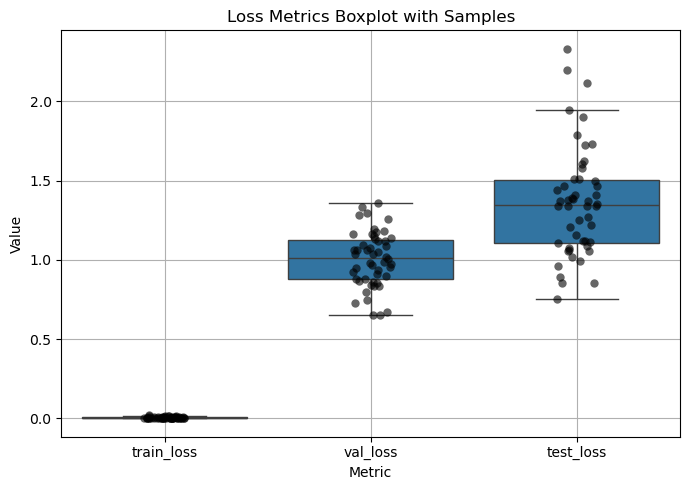

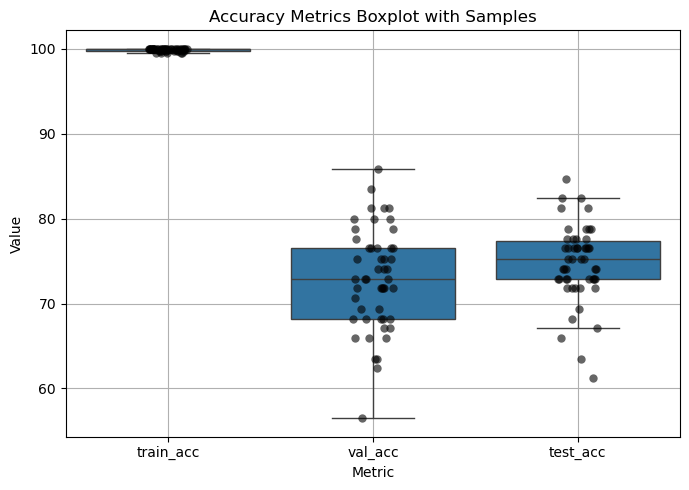

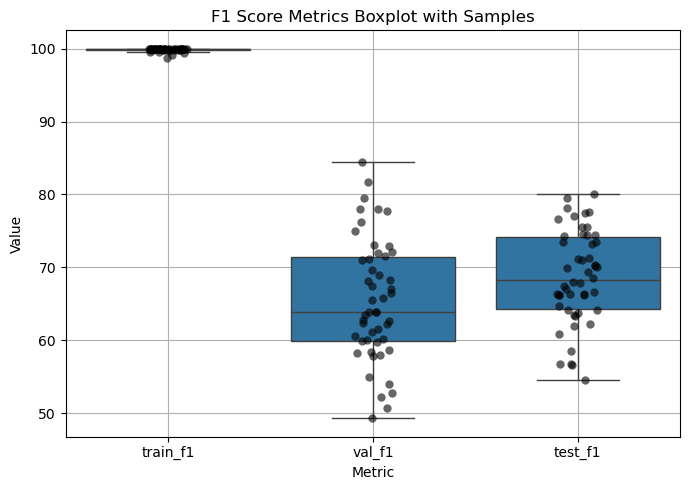

=== Mean and Variance of Each Metric ===
train_loss | Mean: 0.0059 | Variance: 0.0000
val_loss   | Mean: 1.0047 | Variance: 0.0302
test_loss  | Mean: 1.3612 | Variance: 0.1200
train_acc  | Mean: 99.8900 | Variance: 0.0315
val_acc    | Mean: 72.8960 | Variance: 35.5273
test_acc   | Mean: 74.7040 | Variance: 20.7665
train_f1   | Mean: 99.8880 | Variance: 0.0545
val_f1     | Mean: 65.4960 | Variance: 69.2877
test_f1    | Mean: 68.6660 | Variance: 41.1700


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results_new)

# Metric groups
groups = {
    "Loss Metrics": ["train_loss", "val_loss", "test_loss"],
    "Accuracy Metrics": ["train_acc", "val_acc", "test_acc"],
    "F1 Score Metrics": ["train_f1", "val_f1", "test_f1"]
}

# Function to melt DataFrame and plot box + strip
def plot_metrics(metrics, title):
    df_melted = df[metrics].melt(var_name="Metric", value_name="Value")
    
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="Metric", y="Value", data=df_melted, showfliers=False)
    sns.stripplot(x="Metric", y="Value", data=df_melted, 
                  color="black", size=6, jitter=True, alpha=0.6)
    
    plt.title(title)
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each group
for title, metrics in groups.items():
    plot_metrics(metrics, f"{title} Boxplot with Samples")

# Print statistics
print("=== Mean and Variance of Each Metric ===")
for metrics in groups.values():
    for m in metrics:
        mean = df[m].mean()
        var = df[m].var()
        print(f"{m:10s} | Mean: {mean:.4f} | Variance: {var:.4f}")

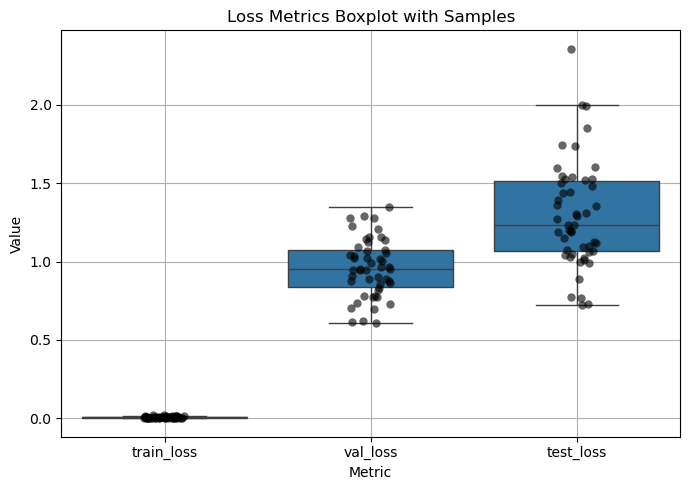

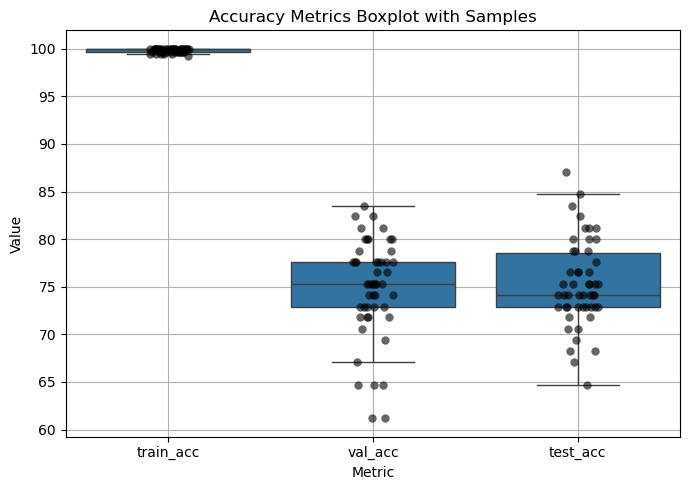

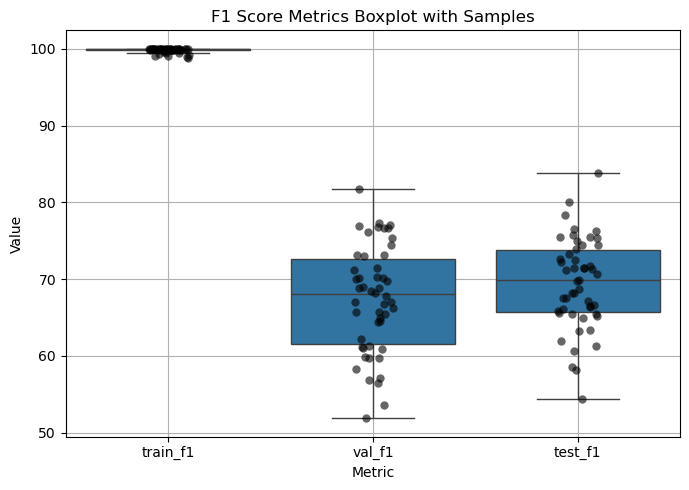

=== Mean and Variance of Each Metric ===
train_loss | Mean: 0.0081 | Variance: 0.0000
val_loss   | Mean: 0.9590 | Variance: 0.0340
test_loss  | Mean: 1.2949 | Variance: 0.1156
train_acc  | Mean: 99.8380 | Variance: 0.0412
val_acc    | Mean: 74.8180 | Variance: 27.5227
test_acc   | Mean: 75.2880 | Variance: 20.6329
train_f1   | Mean: 99.8120 | Variance: 0.0974
val_f1     | Mean: 67.4060 | Variance: 48.0565
test_f1    | Mean: 69.4340 | Variance: 34.7733


In [ ]:
### just a copy of the above code, but with the results_new variable defined ...

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(results_new)

# Metric groups
groups = {
    "Loss Metrics": ["train_loss", "val_loss", "test_loss"],
    "Accuracy Metrics": ["train_acc", "val_acc", "test_acc"],
    "F1 Score Metrics": ["train_f1", "val_f1", "test_f1"]
}

# Function to melt DataFrame and plot box + strip
def plot_metrics(metrics, title):
    df_melted = df[metrics].melt(var_name="Metric", value_name="Value")
    
    plt.figure(figsize=(7, 5))
    sns.boxplot(x="Metric", y="Value", data=df_melted, showfliers=False)
    sns.stripplot(x="Metric", y="Value", data=df_melted, 
                  color="black", size=6, jitter=True, alpha=0.6)
    
    plt.title(title)
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot each group
for title, metrics in groups.items():
    plot_metrics(metrics, f"{title} Boxplot with Samples")

# Print statistics
print("=== Mean and Variance of Each Metric ===")
for metrics in groups.values():
    for m in metrics:
        mean = df[m].mean()
        var = df[m].var()
        print(f"{m:10s} | Mean: {mean:.4f} | Variance: {var:.4f}")

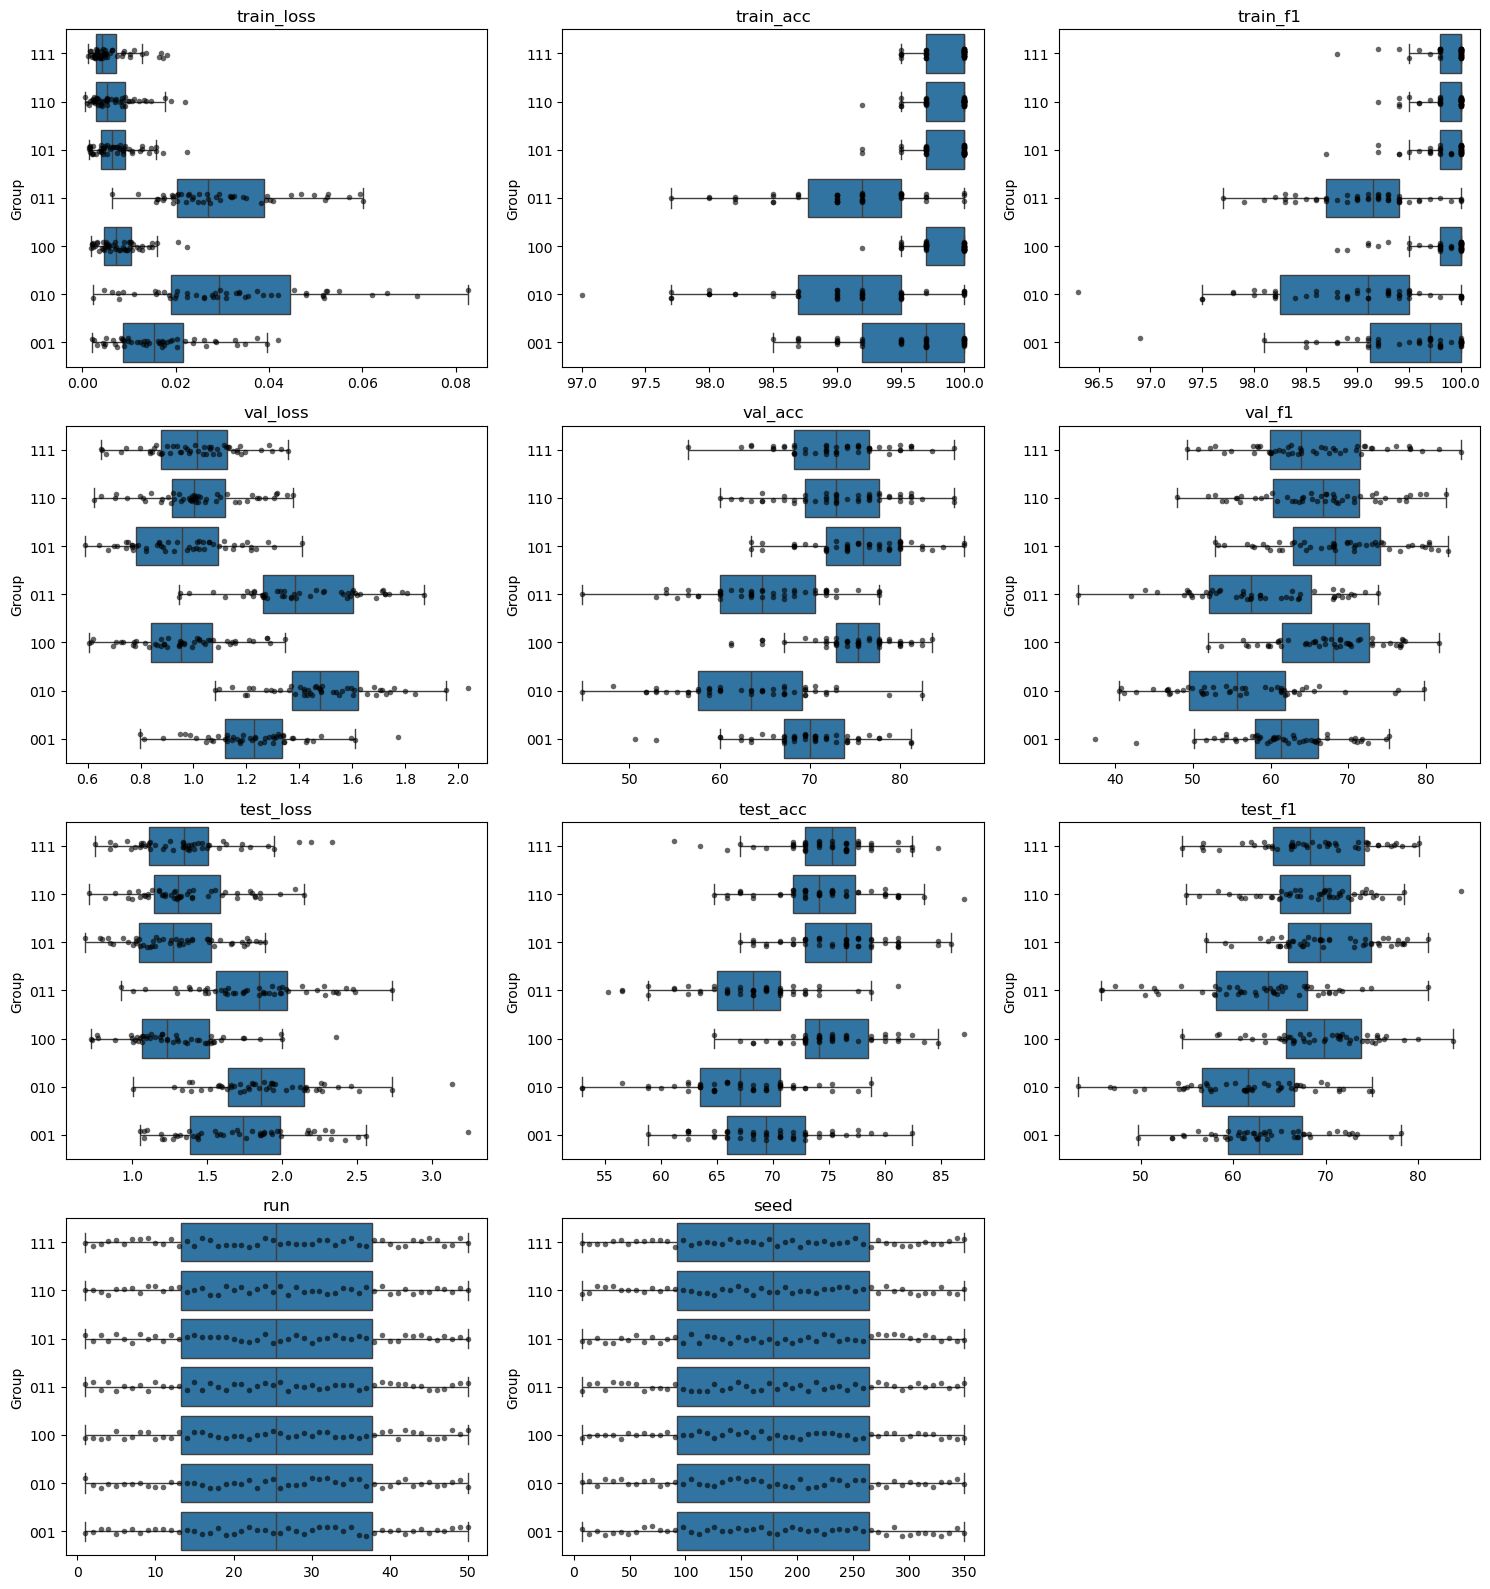

In [ ]:
### Plot ALL the results of the 7 run dicts into a big boxplot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

# ───────────────────────────────────────────────────────────────
# 1) Gather ALL seven runs‐lists into a mapping:
results_map = {
    "111": results_111,  # each of these is a LIST of dicts
    "110": results_110,
    "101": results_101,
    "011": results_011,
    "100": results_100,
    "010": results_010,
    "001": results_001,
}

# 2) Build one big DataFrame with a “group” column
frames = []
for tag, runs in results_map.items():
    # runs is a list of dicts, one dict per experiment/epoch
    df_temp = pd.DataFrame(runs)
    df_temp["group"] = tag
    frames.append(df_temp)

df_all = pd.concat(frames, ignore_index=True)

# 3) Pick out metric columns (everything except “group”)
metrics = [c for c in df_all.columns if c != "group"]
n_metrics = len(metrics)

# 4) Create a grid of subplots (e.g. 3 cols)
n_cols = 3
n_rows = ceil(n_metrics / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

# 5) For each metric, draw a horizontal box+strip plot comparing the 7 groups
for ax, metric in zip(axes, metrics):
    sns.boxplot(
        y="group", 
        x=metric, 
        data=df_all, 
        ax=ax, 
        showfliers=False
    )
    sns.stripplot(
        y="group", 
        x=metric, 
        data=df_all, 
        ax=ax,
        color="black", 
        size=4, 
        jitter=True, 
        alpha=0.6
    )
    ax.set_title(metric)
    ax.set_xlabel("")    # remove the automatic xlabel
    ax.set_ylabel("Group")

# 6) Remove any empty subplots
for ax in axes[n_metrics:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()